In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1- Dataset
Gnération de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset $(x, y)$ qui contient 100 exemples, et une seule variable $x$. Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

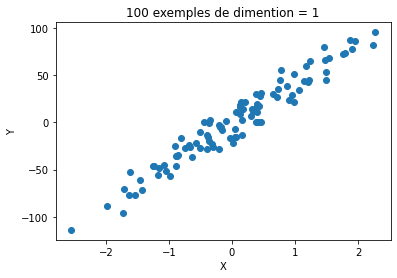

In [3]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.title("100 exemples de dimention = 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

# Important: 
vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [4]:
print("dimention de x = ",x.shape)
print("dimention de y = ",y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print("dimention de y =",y.shape)

dimention de x =  (100, 1)
dimention de y =  (100,)
dimention de y = (100, 1)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (1, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [5]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(1, 1)
print("theta_x =",theta[0])

theta_x = [1.76405235]


# Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [6]:
#definir F=X.Theta
def model(X, theta):
    return X.dot(theta)

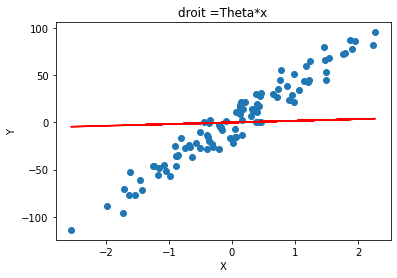

In [7]:
plt.scatter(x, y)
plt.title("droit =Theta*x")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, model(x, theta), c='r')

# Fonction Cout : Erreur Quadratique moyenne¶
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

$ J(\theta) = \frac{1}{2m} \sum (x_i.\theta - y_i)^2  = \frac{1}{2m} \sum (\hat{y_i}- y_i)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [8]:
def cost_function(X, y, theta):
    m = len(y) # m=X.shape[0]
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
print("MSE = ",cost_function(x, y, theta))

MSE =  906.2025963377247


# Gradients et Descente de Gradient
On implémente la formule du gradient pour la MSE

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$ 

In [9]:
#calcule de MSE
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [10]:
#implementation de algo gradient_descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) 
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage $\alpha$, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [11]:
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(x, y, theta, learning_rate, n_iterations)
print("theat optimal =",theta_final)

theat optimal = [[42.57021443]]


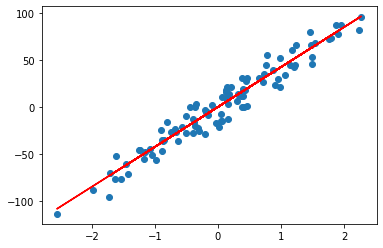

In [12]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(x, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r') #color red (rouge)

# Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

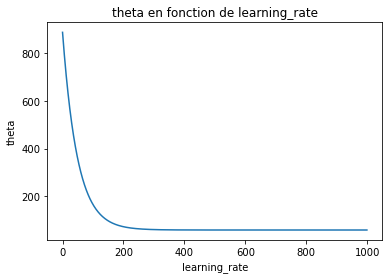

In [13]:
plt.title("theta en fonction de learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("theta")
plt.plot(range(n_iterations), cost_history)

# Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [14]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
print("MSE=",coef_determination(y, predictions))

MSE= 0.9413923338239568
